<a href="https://colab.research.google.com/github/mohzary/ML-Python-IBM-Course/blob/master/regression/lab3_non_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Needed packages

In [0]:

import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import io
from google.colab import files
%matplotlib inline

### Downloading Data


In [2]:
datafile = files.upload()


Saving china_gdp.csv to china_gdp.csv


In [3]:
for fn in datafile.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(datafile[fn])))

data_df = pd.read_csv(io.StringIO(datafile['china_gdp.csv'].decode('utf-8')))

User uploaded file "china_gdp.csv" with length 1218 bytes


## Understanding the Data


In [4]:
data_df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


In [6]:
data_df.describe()

,Year,Value
count,55.00000,5.500000e+01
mean,1987.00000,1.437042e+12
std,16.02082,2.500085e+12
min,1960.00000,4.668518e+10
25%,1973.50000,1.395123e+11
50%,1987.00000,3.074796e+11
75%,2000.50000,1.268748e+12
max,2014.00000,1.035483e+13


##Now, lets plot each of these features vs the Emission, to see how linear is their relation:

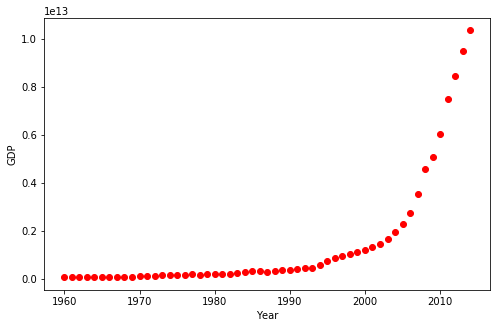

In [10]:

plt.figure(figsize=(8,5))
x_data, y_data = (data_df["Year"].values, data_df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

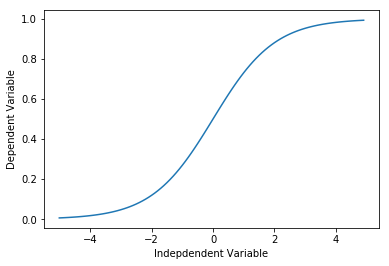

In [11]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

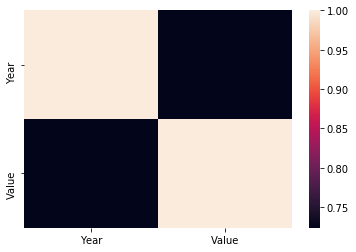

In [12]:
import seaborn as sns
corr = data_df.corr()
sns.heatmap(corr)

#### Creating train and test dataset


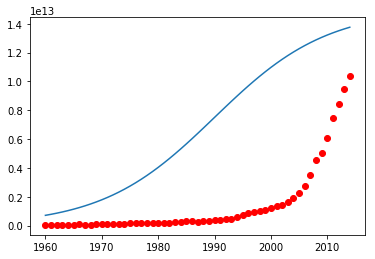

In [14]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y
beta_1 = 0.10
beta_2 = 1990.0

#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

 beta_1 = 690.453017, beta_2 = 0.997207


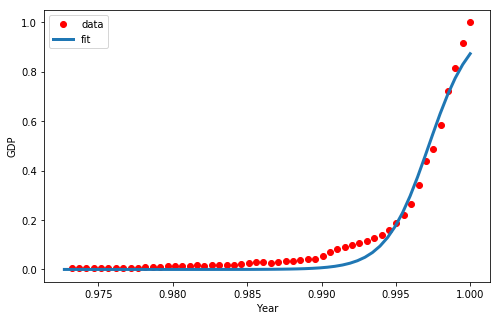

In [15]:
# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()